In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style('dark')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
import matplotlib.pyplot as plt

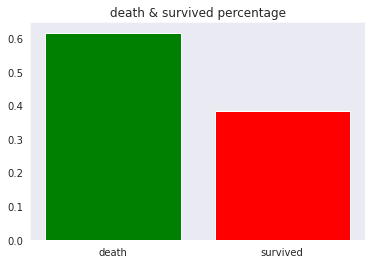

In [8]:
left=[1,0]
height=[0.383838,0.616162]
tick_label=['survived','death']
plt.bar(left,height,tick_label=tick_label,width=0.8,color=['red','green'])
plt.title('death & survived percentage')
plt.show()

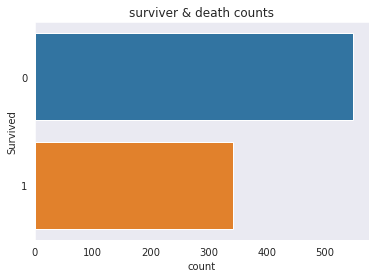

In [9]:
g=sns.countplot(y=train_data['Survived']).set_title('surviver & death counts')

In [10]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train_data.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

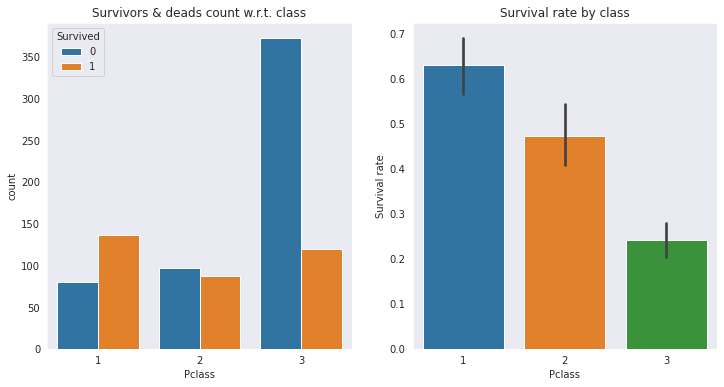

In [12]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=train_data, 
                  ax=axarr[0]).set_title('Survivors & deads count w.r.t. class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [13]:
train_data.groupby(['Pclass','Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

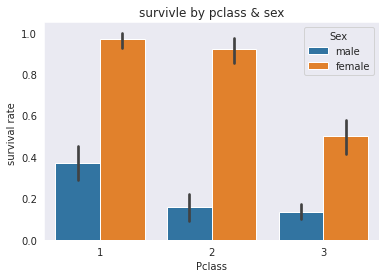

In [14]:
plt.title('survivle by pclass & sex')
g=sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_data).set_ylabel('survival rate ')

In [15]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

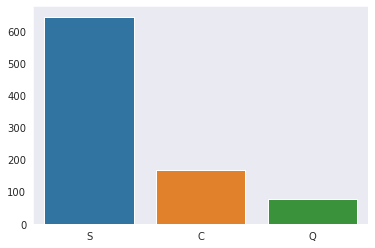

In [16]:
g=sns.barplot(x=['S','C','Q'],y=[644,168,77] )

In [17]:
train_data.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

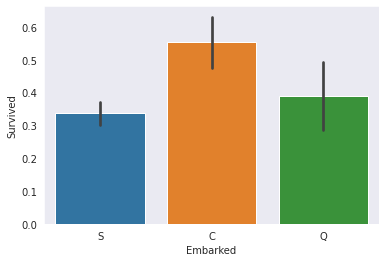

In [18]:
g=sns.barplot(x='Embarked',y='Survived',data=train_data)

In [19]:
train_data.groupby(['Embarked','Sex']).Survived.mean()

Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64

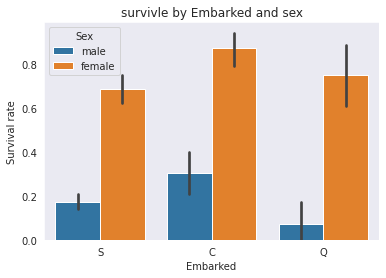

In [20]:
plt.title('survivle by Embarked and sex')
g=sns.barplot(x='Embarked',y='Survived',hue='Sex',data=train_data).set_ylabel('Survival rate')

In [21]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

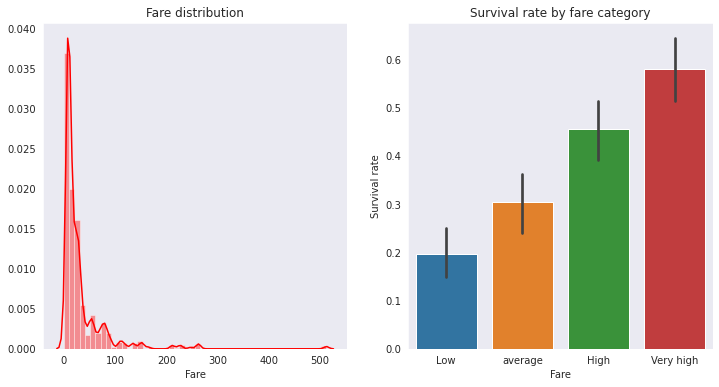

In [22]:
fig, hrr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train_data.Fare, color='r', ax=hrr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'average', 'High', 'Very high'])
hrr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train_data.Survived, ax=hrr[1]).set_ylabel('Survival rate')


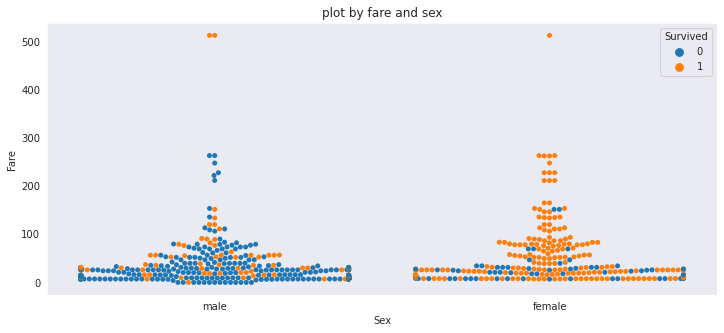

In [23]:
plt.figure(figsize=(12,5))
g=sns.swarmplot(x='Sex',y='Fare',hue='Survived',data=train_data).set_title('plot by fare and sex')

In [24]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

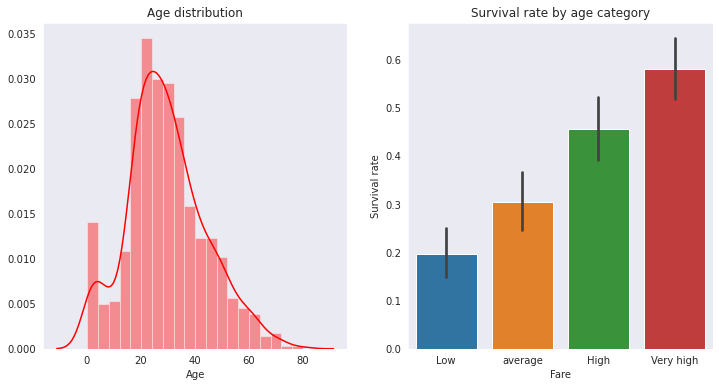

In [25]:
fig, hrrr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train_data.Age, color='r', ax=hrrr[0]).set_title('Age distribution')
age_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'average', 'High', 'Very high'])
hrrr[1].set_title('Survival rate by age category')
g = sns.barplot(x=age_ranges, y=train_data.Survived, ax=hrrr[1]).set_ylabel('Survival rate')


In [26]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [27]:
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Capt              1
the Countess      1
Jonkheer          1
Ms                1
Don               1
Mme               1
Sir               1
Lady              1
Name: Title, dtype: int64

In [28]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [29]:
train_data['Title'].replace(['Major','Col','Capt','Don','Jonkheer','Sir'],'Mr',inplace=True)
test_data['Title'].replace(['Major','Col','Capt','Don','Jonkheer','Sir'],'Mr',inplace=True)
train_data['Title'].replace(['Mlle','Lady','Dona','Mme','Ms','the Countess'],'Miss',inplace=True)
test_data['Title'].replace(['Mlle','Lady','Dona','Mme','Ms','the Countess'],'Miss',inplace=True)

In [30]:
train_data.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

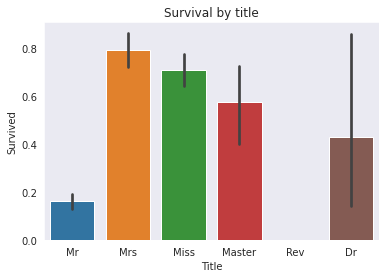

In [31]:
g=sns.barplot(x='Title' ,y='Survived',data=train_data).set_title('Survival by title')

In [32]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

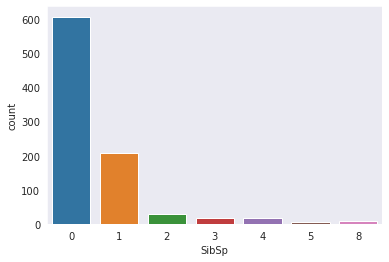

In [33]:
g=sns.countplot(train_data['SibSp'])

In [34]:
train_data.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

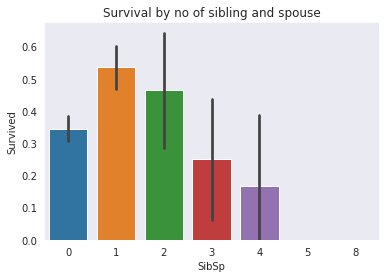

In [35]:
g=sns.barplot(x='SibSp',y='Survived',data=train_data).set_title('Survival by no of sibling and spouse')

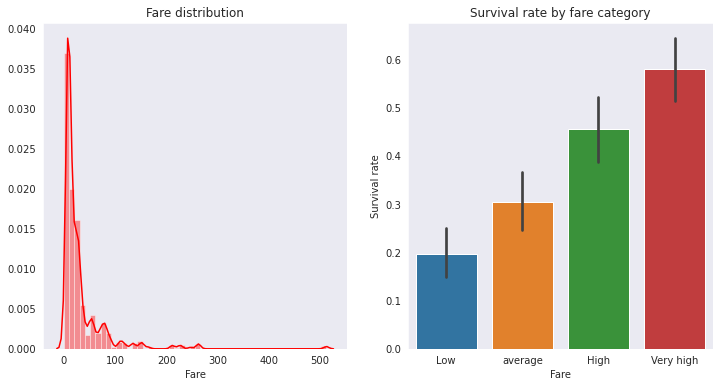

In [36]:
fig, hrr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train_data.Fare, color='r', ax=hrr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'average', 'High', 'Very high'])
hrr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train_data.Survived, ax=hrr[1]).set_ylabel('Survival rate')


In [37]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

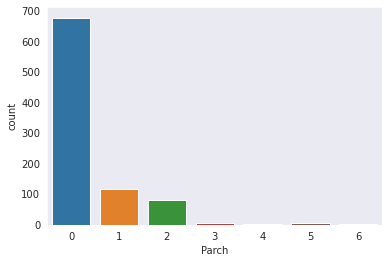

In [38]:
g=sns.countplot(train_data['Parch'])

In [39]:
train_data.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

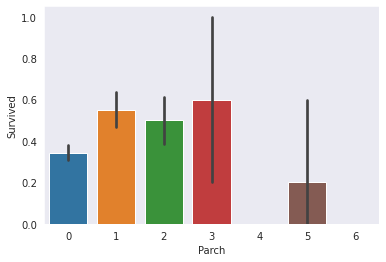

In [40]:
g=sns.barplot(x='Parch',y='Survived',data=train_data)

In [41]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] + 1

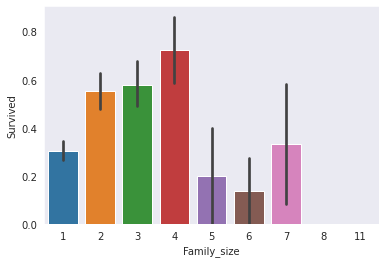

In [42]:
g=sns.barplot(x=train_data.Family_size,y=train_data.Survived)

In [43]:
y = train_data['Survived']
features = ['Pclass', 'Sex', 'Fare', 'Title', 'Embarked', 'Family_size']
X = train_data[features]
X.head()

,Pclass,Sex,Fare,Title,Embarked,Family_size
0,3,male,7.2500,Mr,S,2
1,1,female,71.2833,Mrs,C,2
2,3,female,7.9250,Miss,S,1
3,1,female,53.1000,Mrs,S,2
4,3,male,8.0500,Mr,S,1


In [44]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Sex', 'Title', 'Embarked', 'Family_size']


numerical_transformer = SimpleImputer(strategy='median')


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


titanic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=0, 
                                                               n_estimators=500, max_depth=5))
                             ])


titanic_pipeline.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.826


In [45]:
X_test = test_data[features]
X_test.head()

,Pclass,Sex,Fare,Title,Embarked,Family_size
0,3,male,7.8292,Mr,Q,1
1,3,female,7.0000,Mrs,S,2
2,2,male,9.6875,Mr,Q,1
3,3,male,8.6625,Mr,S,1
4,3,female,12.2875,Mrs,S,3


In [46]:
predictions = titanic_pipeline.predict(X_test)

In [47]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print('submitted')

submitted
